In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from uncertainties import unumpy as unp
from uncertainties import *
from pylab import *
from scipy.signal import savgol_filter, find_peaks, peak_widths
from scipy.odr import *
%matplotlib inline

ModuleNotFoundError: No module named 'uncertainties'

In [2]:
df = pd.read_excel (r'XST_Daten.xlsx')
#df = df.drop(0,0)
df.head()

,Winkel NaCl,NaCl,Winkel Zirk,Zirk,Winkel NaCl.1,NaCl180,LiF,Strom,R_0,R_1,...,R_9,Unnamed: 18,Unnamed: 19,&b / °,R_0 / 1/s,R_1 / 1/s,R_2 / 1/s,R_3 / 1/s,R_4 / 1/s,R_5 / 1/s
0,2.0,6.0,4.0,96.0,2.0,4.0,2,8.0,20.5,51.8,...,249.0,NaN,NaN,4.0,16.1,NaN,NaN,NaN,NaN,NaN
1,2.1,4.0,4.1,103.0,2.1,4.0,3,8.1,25.8,52.8,...,251.0,NaN,NaN,4.1,15.4,NaN,NaN,NaN,NaN,NaN
2,2.2,5.0,4.2,93.0,2.2,3.0,7,8.2,24.5,53.8,...,239.8,NaN,NaN,4.2,14.9,NaN,NaN,NaN,NaN,NaN
3,2.3,8.0,4.3,152.0,2.3,4.0,8,8.3,28.3,49.0,...,227.5,NaN,NaN,4.3,17.3,NaN,NaN,NaN,NaN,NaN
4,2.4,7.0,4.4,130.0,2.4,6.0,8,8.4,24.8,52.0,...,236.3,NaN,NaN,4.4,18.0,NaN,NaN,NaN,NaN,NaN


Aufgabe 1, comparison von NaCl mit sichselbst gedreht fuer unsicherheit

In [25]:
avg=df.mean()['Zirk']
avg=float(avg)
df22=df.loc[df['Zirk']>avg]
names=df22[]

,Winkel NaCl,NaCl,Winkel Zirk,Zirk,Winkel NaCl.1,NaCl180,LiF,Strom,R_0,R_1,...,R_9,Unnamed: 18,Unnamed: 19,&b / °,R_0 / 1/s,R_1 / 1/s,R_2 / 1/s,R_3 / 1/s,R_4 / 1/s,R_5 / 1/s
3,2.0,8.0,4.3,152.0,2.3,4.0,8,8.3,28.3,49.0,...,227.5,NaN,NaN,4.3,17.3,NaN,NaN,NaN,NaN,NaN
4,2.0,7.0,4.4,130.0,2.4,6.0,8,8.4,24.8,52.0,...,236.3,NaN,NaN,4.4,18.0,NaN,NaN,NaN,NaN,NaN
5,2.0,4.0,4.5,129.0,2.5,2.0,10,8.5,20.8,44.3,...,248.3,NaN,NaN,4.5,17.4,10.9,NaN,NaN,NaN,NaN
6,2.0,6.0,4.6,139.0,2.6,8.0,5,8.6,21.8,50.0,...,228.3,NaN,NaN,4.6,17.6,11.1,NaN,NaN,NaN,NaN
7,2.0,4.0,4.7,137.0,2.7,6.0,8,8.7,23.0,49.5,...,238.3,NaN,NaN,4.7,15.4,12.3,NaN,NaN,NaN,NaN
9,2.0,3.0,4.9,162.0,2.9,3.0,20,8.9,30.5,67.0,...,321.5,NaN,NaN,4.9,21.4,10.8,NaN,NaN,NaN,NaN
30,2.0,335.0,7.0,185.0,5.0,361.0,19,11.0,15.0,39.8,...,182.8,NaN,NaN,7.0,NaN,137.8,99.0,65.81,7.69,3.00
31,2.0,345.0,7.1,576.0,5.1,349.0,21,NaN,NaN,NaN,...,NaN,NaN,NaN,7.1,NaN,NaN,103.1,72.19,12.63,3.75
32,2.0,379.0,7.2,846.0,5.2,336.0,18,NaN,NaN,NaN,...,NaN,NaN,NaN,7.2,NaN,NaN,100.3,85.25,16.19,3.19
33,2.0,365.0,7.3,798.0,5.3,374.0,21,NaN,NaN,NaN,...,NaN,NaN,NaN,7.3,NaN,NaN,113.4,89.50,30.38,4.50


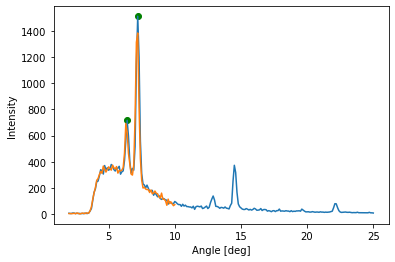

In [3]:
plt.plot(df['Winkel NaCl'],df['NaCl'])
plt.plot(df['Winkel NaCl'],df['NaCl180'])
dist=8
prom=80
(peak_pos, properties) = find_peaks(df['NaCl'],distance=dist,prominence=prom, width=1)
(peak_pos180, properties180) = find_peaks(df['NaCl180'],distance=dist,prominence=prom, width=1)
x_list=[]
y_list=[]
x_list180 =[]
y_list180=[]
for pos in peak_pos:
    x_list.append(df['Winkel NaCl'][pos])
    y_list.append(df['NaCl'][pos])
for pos in peak_pos180:
    x_list180.append(df['Winkel NaCl.1'][pos])
    y_list180.append(df['NaCl180'][pos])
x_list=x_list[:2]
y_list=y_list[:2]
plt.scatter(x_list,y_list,color='Green')
plt.xlabel('Angle [deg]')
plt.ylabel('Intensity')
plt.savefig('Aufgabe 1',bbox_inches="tight")

In [4]:
widths,widths180= properties['widths'],properties180['widths']
widths,widths180=np.array(widths[:2]),np.array(widths)
halfwidths,halfwidths180= widths/2,widths180/2

In [5]:
halfwidths

array([1.35518368, 1.64872073])

In [6]:
def unc(value,err):
    return ufloat(value,err)

In [7]:
winkel_1=unc(x_list[0],0.05) 
winkel_2=unc(x_list[1],0.05)
winkel180_1=unc(x_list180[0],0.05) 
winkel180_2=unc(x_list180[1],0.05)

In [8]:
print(winkel_1,winkel_2)
print(winkel180_1,winkel180_2)

6.40+/-0.05 7.20+/-0.05
6.30+/-0.05 7.20+/-0.05


In [9]:
winkelfehler=(winkel_1-winkel180_1)/2

In [10]:
winkelfehler
0.05+0.03

0.08

 # Aufgabe 9
 Transmission der Zirkonium-Folie

0.50+/-0.05


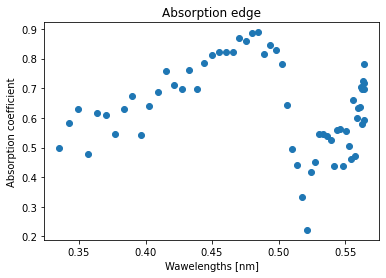

In [11]:
I0=np.array(df['NaCl'])
x=np.array(df['Winkel Zirk'])/(2*np.pi)
I0=I0[20:]
I=np.array(df['Zirk'])
I,x=I[0:len(I0)],x[0:len(I0)]
Trans=I/I0
Abs=1-Trans
d=564.02e-12
#I0=I0[0:]
mu= (-1/d)*np.log(Abs/I0)
x = x[np.logical_not(np.isnan(x))]
Abs =Abs[np.logical_not(np.isnan(Abs))]
lam=d*np.sin(x)*10**9
lam_abs=d*np.sin(1.1)*10**9
lam_abs=ufloat(lam_abs,lam_abs*0.1)
plt.xlabel('Wawelengths [nm]')
plt.ylabel('Absorption coefficient')
plt.title('Absorption edge')
plt.scatter(lam,Abs)
plt.savefig('Absorptionskante',bbox_inches="tight")
print(lam_abs)

In [12]:
h=6.62607004
c=3
ten=-34+8+9+19
lam_abs

0.5026587752218508+/-0.05026587752218508

In [13]:
E=(h*c*10**ten)/(lam_abs*1.602)
E

2468.547546185129+/-246.8547546185129

# Aufgabe 8

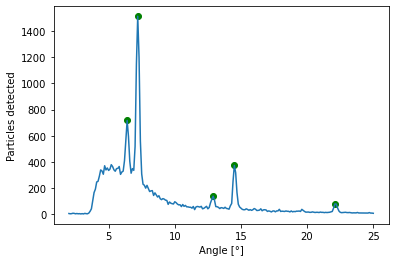

In [14]:
#A1
winkel=df['Winkel NaCl']
intensi=df['NaCl']


#find peaks
peaks1=[]
peaks2=[]
peaks3=[]
prom1=50
dist1=1
peaks_1,propertiesx=find_peaks(intensi,distance=dist1,prominence=prom1, width=1)
x_list2=[]
y_list2=[]
for pos in peaks_1:
    x_list2.append(df['Winkel NaCl'][pos])
    y_list2.append(df['NaCl'][pos])
x_list2=x_list2[1:]
x_list2=np.array(x_list2)
y_list2=y_list2[1:]
widths=propertiesx['widths']
plt.scatter(x_list2,y_list2,color='Green')
plt.plot(winkel,intensi)
plt.xlabel("Angle [°]")
plt.ylabel("Particles detected")
#plt.title(titel[i])
#plt.legend()
plt.savefig("A4.jpg", dpi=150)

In [15]:
x_list2_err=[]
for i in x_list2:
    x=ufloat(i,0.08)
    x_list2_err.append(x)
x_list2_err=np.array(x_list2_err)
d=564.02e-12
lam1=np.array(d*unp.sin(unp.radians(x_list2_err[0:2])))
lam2=np.array(d*unp.sin(unp.radians(x_list2_err[2:4])))/2
lam3=np.array(d*unp.sin(unp.radians(x_list2_err[-1])))/3

In [16]:
print(lam1)
print(lam2)
print(lam3)

[6.28707071430117e-11+/-7.826125924503457e-13
 7.069045039493889e-11+/-7.813106495323968e-13]
[6.295876521624839e-11+/-3.8382220360381043e-13
 7.060966494339303e-11+/-3.8121804905464626e-13]
(7.073+/-0.024)e-11


In [17]:
E1=(h*c*10**ten)/(lam1*10**12*1.602) #in eV
E2=(h*c*10**ten)/(lam2*10**12*1.602) #in eV
E3=(h*c*10**ten)/(lam3*10**12*1.602) #in eV
print(E1)
print(E2)
print(E3)

[19.73633099624275+/-0.24567722979945075
 17.553107657539556+/-0.19400682650348777]
[19.708726527280856+/-0.12015240165436933
 17.573190400168123+/-0.09487677593978978]
17.54+/-0.06


In [18]:
#weighted average lamda
lam=np.concatenate((lam1,lam2)) 
lam= np.append(lam,lam3)
lam*=10**12 #in pm
lam_val=unp.nominal_values(lam)
lam_err=unp.std_devs(lam)
weight= 1/(unp.std_devs(lam))**2
lam_beta=np.array([lam_val[0],lam_val[2]])
lam_alpha=np.array([lam_val[1],lam_val[3],lam_val[-1]])
lam_err_beta=np.array([lam_err[0],lam_err[2]])
lam_err_alpha=np.array([lam_err[1],lam_err[3],lam_err[-1]])
w_beta=np.array([weight[0],weight[2]])
w_alpha=np.array([weight[1],weight[3],weight[-1]])
avg_beta_lam=np.average(lam_beta,weights=w_beta)
avg_err_beta_lam=np.average(lam_err_beta,weights=w_beta)
avg_alpha_lam=np.average(lam_alpha,weights=w_alpha)
avg_err_alpha_lam=np.average(lam_err_alpha,weights=w_alpha)
print(f'The weighted average of the K-beta line is at {avg_beta_lam} +- {avg_err_beta_lam} pm')
print(f'The weighted average of the K-alpha line is at {avg_alpha_lam} +- {avg_err_alpha_lam} pm')

The weighted average of the K-beta line is at 62.94169146453737 +- 0.4611444505442989 pm
The weighted average of the K-alpha line is at 70.69665747358628 +- 0.31524122186798864 pm


In [19]:
#weighted average energies
#everything is called lambda but we are working with energies
lam=np.concatenate((E1,E2)) 
lam= np.append(lam,E3)
lam_val=unp.nominal_values(lam)
lam_err=unp.std_devs(lam)
weight= 1/(unp.std_devs(lam))**2
lam_beta=np.array([lam_val[0],lam_val[2]])
lam_alpha=np.array([lam_val[1],lam_val[3],lam_val[-1]])
lam_err_beta=np.array([lam_err[0],lam_err[2]])
lam_err_alpha=np.array([lam_err[1],lam_err[3],lam_err[-1]])
w_beta=np.array([weight[0],weight[2]])
w_alpha=np.array([weight[1],weight[3],weight[-1]])
avg_beta=np.average(lam_beta,weights=w_beta)
avg_err_beta=np.average(lam_err_beta,weights=w_beta)
avg_alpha=np.average(lam_alpha,weights=w_alpha)
avg_err_alpha=np.average(lam_err_alpha,weights=w_alpha)
print(f'The weighted average of the K-beta line is at {avg_beta} +- {avg_err_beta} keV')
print(f'The weighted average of the K-alpha line is at {avg_alpha} +- {avg_err_alpha} keV')

The weighted average of the K-beta line is at 19.714054697915184 +- 0.14438100406381743 keV
The weighted average of the K-alpha line is at 17.551535849482228 +- 0.07823907746611375 keV
